In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

### (a)

In [33]:
# take 1000 samples from gaussian distribution with mean -10 and standard deviation 5
gaussian1 = np.random.normal(-10,5,1000)
# take 1000 samples from gaussian distribution with mean 10 and standard deviation 5
gaussian2 = np.random.normal(10,5,1000)

(array([  19.,   42.,   88.,  166.,  225.,  198.,  151.,   67.,   36.,    8.]),
 array([ -3.11103798,  -0.37189387,   2.36725024,   5.10639435,
          7.84553846,  10.58468257,  13.32382668,  16.06297079,
         18.8021149 ,  21.54125901,  24.28040312]),
 <a list of 10 Patch objects>)

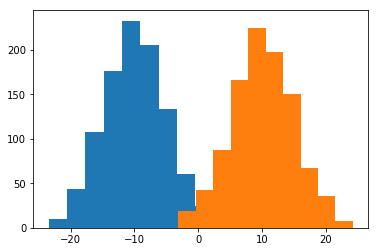

In [34]:
# plot histograms for both sets of points
plt.hist(gaussian1)
plt.hist(gaussian2)

(array([   5.,   37.,   82.,  190.,  227.,  248.,  133.,   59.,   16.,    3.]),
 array([-21.41143607, -16.89459541, -12.37775476,  -7.86091411,
         -3.34407345,   1.1727672 ,   5.68960786,  10.20644851,
         14.72328916,  19.24012982,  23.75697047]),
 <a list of 10 Patch objects>)

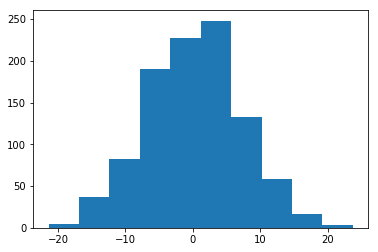

In [35]:
# add two sets together, point by point and plot histogram
sum1 = gaussian1 + gaussian2
plt.hist(sum1)

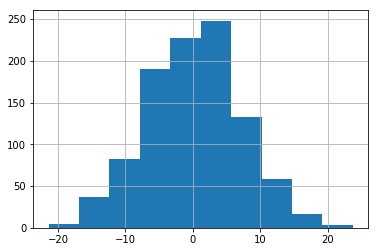

In [36]:
sumSeries = pd.Series(sum1)
sumSeries.hist()

### (b)

In [37]:
# mean of set
sumSeries.mean()

0.1828359972874627

In [38]:
# variance of set
var = sumSeries.var()
var

48.69445846689425

## Problem 2

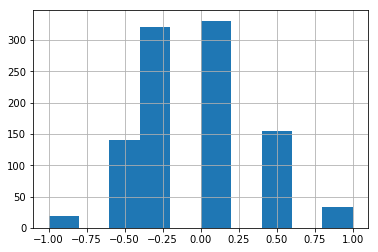

In [39]:
n=5
# take n*1000 samples of bernoulli distribution with values {-1,1} and probability 1/2
dist2 = np.random.choice([1,-1],(n,1000))
# average each set of n samples to sample Zn 1000 times and plot the histogram
bernSeries = pd.Series(dist2.mean(0))
bernSeries.hist()

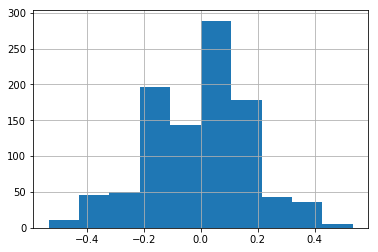

In [40]:
# repeat with n = 30
n=30
dist2 = np.random.choice([1,-1],(n,1000))
bernSeries = pd.Series(dist2.mean(0))
bernSeries.hist()

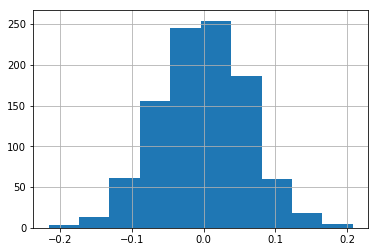

In [41]:
# repeat with n = 250
n=250
dist2 = np.random.choice([1,-1],(n,1000))
bernSeries = pd.Series(dist2.mean(0))
bernSeries.hist()

## Problem 3

In [42]:
# take 25000 samples from gaussian distribution
gauss3 = np.random.normal(0,5,25000)
# determine mean of distribution
mean3 = gauss3.sum()/gauss3.size
mean3

0.01041627697876067

In [43]:
# determine standard deviation of distribution by finding the distance of each point from the mean
# then averaging the distances and taking the square root
diff3 = gauss3 - mean3
distance3 = diff3**2
stddev3 = np.sqrt(distance3.sum()/distance3.size)
stddev3

5.0200598207931444

## Problem 4

In [44]:
# take 10000 samples from the multivariate normal distribution
multigauss4 = np.random.multivariate_normal([-5,5],[[20,.8],[.8,30]],10000)
multigauss4

array([[ -2.97755758,   1.92026433],
       [ -9.7919286 ,   6.78301971],
       [-13.89185557,   1.99299498],
       ..., 
       [ -3.37754939,   5.4573761 ],
       [-15.67766909,   3.32603939],
       [-10.2023431 ,   4.51035767]])

In [45]:
# find the mean of x values and y values separately 
mean4 = multigauss4.sum(0)/multigauss4.shape[0]
meanX4 = mean4[0]
meanY4 = mean4[1]
mean4

array([-5.00323011,  5.02830118])

In [46]:
# find the variance of X by taking the distance of each x point from the mean of X and finding the average
# do the same for y
diff4 = multigauss4 - mean4
distance4 = diff4**2
var4 = distance4.sum(0)/distance4.shape[0]
varX4 = var4[0]
varY4 = var4[1]
var4

array([ 19.81062134,  29.83039021])

In [47]:
# find the covariance of X and Y by multiplying (x-E[X]) and (y-E[Y]) for each point (x,y) then find the average for all points
prod4 = np.prod(diff4,1)
cov4 = prod4.sum()/prod4.size
cov4

1.0894553611648978

## Problem 5

In [48]:
path='PatientData.csv'
df=pd.read_csv(path,header=None,na_values='?')

### (a)

In [49]:
# number of patients is 452, number of features is 280
df.shape 

(452, 280)

### (b)

#### First column

In [50]:
# show top 8 highest counts of the first column
df[0].value_counts()[:8]  

46    15
36    14
37    14
47    14
44    13
35    13
45    13
40    12
Name: 0, dtype: int64

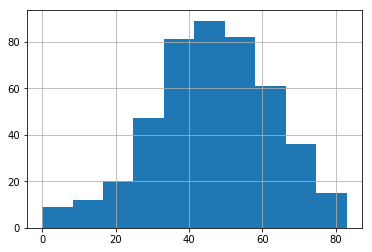

In [51]:
# show histogram of first column/feature
df[0].hist(bins=10)

The first column/feature (df[0]) ranges from 0 to around 80, with the mode being 46. We can assume the first feature to be the age of the patient.

#### Second column

In [52]:
# show top highest counts of second column
df[1].value_counts()  

1    249
0    203
Name: 1, dtype: int64

Looks like a binary feature but can't make a conclusion on what the feature is with just this information. We will move onto the third column to see if it can help us decipher the second column.

#### Third column

In [53]:
# show top counts for third column
df[2].value_counts()[:10]

160    81
165    46
170    40
155    23
175    21
156    19
163    16
162    15
168    15
172    14
Name: 2, dtype: int64

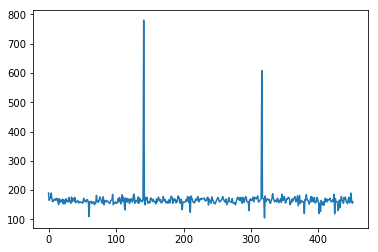

In [54]:
# plot value vs patient number
plt.plot(df[2])

In [55]:
# show the rows where df[2] is big, which would be the two random spikes in the data
df[df[2]>200]  

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5


In [56]:
df[2].mean()

166.18805309734512

Besides the two outlier patients which seem to be errors, most patients seem to be around the 155-175 range for column three. We can conclude that this feature is most likely the height in centimeters of the patient.

#### Back to second column

In [57]:
# show the averages of each column, grouped by the value of column one (the binary feature)
df2 = df.groupby(1).mean()
df2

,0,2,3,4,5,6,7,8,9,10,...,270,271,272,273,274,275,276,277,278,279
1,,,,,,,,,,,,,,,,,,,,,
0,47.546798,171.315271,72.724138,94.650246,157.472906,364.546798,177.231527,92.320197,30.187192,45.271357,...,-0.419212,9.211823,-1.663054,0.002463,0.0,0.509360,1.118719,18.852709,28.519704,4.748768
1,45.594378,162.008032,64.457831,84.248996,153.261044,369.377510,164.012048,88.116466,36.522088,28.742857,...,-0.164659,8.914458,-1.289558,0.005221,0.0,0.519277,1.306827,19.712048,30.250602,3.172691


We can see that the average height of patients with df[1]=0 is 171cm and patients with df[1]=1 is 162 cm. Thus, we can assume that the second feature is the gender of the patient. Specifically, the value 0 indicates male and value 1 indicates female.

#### Fourth column

Looking online at national averages for men and women, we can also conclude that the fourth column df[3] is the feature weight in kilograms.

### (c)

In [58]:
# fill the missing values with the averages of their respective columns
df.fillna(df.mean())

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


### (d)